In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
baseDir = os.getcwd()+'/../'
ProcaPath = baseDir+'ProcaSolutions/'

In [2]:
dat=pd.read_csv(ProcaPath+'SolutionSet.dat', delimiter='\t')

In [19]:
dat[(dat["ModeNumber"]==1)&(dat["Overtone"]==0)][["Einf"]].values

array([[6.71970235e-09],
       [7.31090585e-09],
       [5.32615285e-09],
       [3.09814649e-09],
       [3.41497797e-09],
       [3.18433265e-09],
       [4.24066323e-09],
       [7.75756967e-09],
       [7.07380810e-09],
       [1.23974232e-08],
       [2.77518634e-08],
       [3.20146883e-08],
       [5.43226377e-08],
       [5.22074185e-08],
       [6.00057159e-08],
       [6.89693768e-08],
       [5.35690977e-08],
       [3.78265867e-08],
       [2.75565905e-08],
       [1.90355344e-08],
       [6.57114118e-09],
       [2.85352259e-09]])

In [23]:
from scipy.interpolate import CubicSpline
datapoints = dat[(dat["ModeNumber"]==1)&(dat["Overtone"]==0)][["ProcaMass"]].values.ravel()
einf = dat[(dat["ModeNumber"]==1)&(dat["Overtone"]==0)]["Einf"].values.ravel()
interp = CubicSpline(datapoints,einf)

In [24]:
einf

array([6.71970235e-09, 7.31090585e-09, 5.32615285e-09, 3.09814649e-09,
       3.41497797e-09, 3.18433265e-09, 4.24066323e-09, 7.75756967e-09,
       7.07380810e-09, 1.23974232e-08, 2.77518634e-08, 3.20146883e-08,
       5.43226377e-08, 5.22074185e-08, 6.00057159e-08, 6.89693768e-08,
       5.35690977e-08, 3.78265867e-08, 2.75565905e-08, 1.90355344e-08,
       6.57114118e-09, 2.85352259e-09])

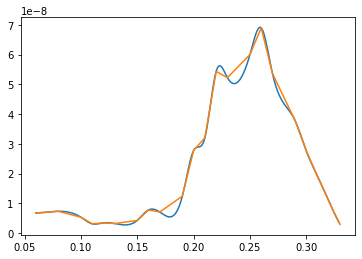

In [25]:
x = np.arange(0.06, 0.33,0.001)
p1 = plt.plot(x,interp(x))
p2 = plt.plot(datapoints,einf)